In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(5, 3))
ax.set(xlim=(-3, 3), ylim=(-1, 1))

x = np.linspace(-3, 3, 91)
t = np.linspace(1, 25, 30)
X2, T2 = np.meshgrid(x, t)

sinT2 = np.sin(2*np.pi*T2/T2.max())
F = 0.9*sinT2*np.sinc(X2*(1 + sinT2))

line = ax.plot(x, F[0, :], color='k', lw=2)[0]

def animate(i):
    line.set_ydata(F[i,:])
    
anim = FuncAnimation(
    fig, animate, interval=100, frames=len(t)-1)

plt.draw()
plt.show()

anim.save('filename.htm')


#Useful link not to this tho : https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/

<Figure size 500x300 with 1 Axes>

<type 'numpy.ndarray'>


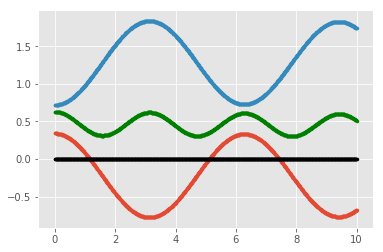

In [244]:
"""
1 Dimensional Gas Interacting with a 1/Sqrt(r) force to nearest neighbors. This is a deterministic simulation
to watch how systems relax to equilibrium. Particles are initialized at random positions w/ zero momenta.
Made with reference to Jake Vanderplas' simulation found online.
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.spatial.distance import pdist, squareform
from operator import itemgetter

plt.style.use('ggplot')

class ParticleLine: 
    def __init__(self,
                init_state = np.asarray([[1.0,1.0],[0.5,0.5]]),
                bounds = [-7,7],
                M = 1,
                Fo = 0.5,
                # 0.1 for weaker force
                size = 0.06):
        
        self.init_state = np.asarray(sorted(init_state,key=itemgetter(0)))
        self.M = M
        self.state = self.init_state.copy()
        self.time_elapsed = 0
        self.bounds = bounds
        self.Fo = Fo
        self.N = len(self.state)
        self.size = size
        self.A = np.zeros(self.N)
        self.momentum = np.sum(line.state[:,1])
        
    def step(self,dt):
        """Evolves system by a single timestep"""
        self.time_elapsed += dt 
        
        # Update Position
        self.state[:,0] += dt*self.state[:,1] + 0.5*self.A*dt**2
        
        # Bad fix to a weird bug 
        self.state = np.asarray(sorted(self.state, key=itemgetter(0)))
        
        # Calculate the distance -> force -> acceleration
        self.D = np.abs(np.ediff1d(self.state[:,0]))
        self.F = -self.Fo*(self.D-1.5)
        self.F = np.insert(self.F,[0,self.N-1],[0,0])
        self.A = -1*np.ediff1d(self.F)/self.M

        
        # Update velocities
        self.state[:,1] += dt*self.A

        # Make sure particles don't leave walls 
        crossed_x1 = (self.state[:,0] < self.bounds[0])
        crossed_x2 = (self.state[:,0] > self.bounds[1])
        
        self.state[crossed_x1,0] = self.bounds[0]
        self.state[crossed_x2,0] = self.bounds[1]
        
        self.state[crossed_x1,1] *= -1
        self.state[crossed_x2,1] *= -1
        
#--------------------------------------------------------------------
#Initialize a random starting state. 
np.random.seed(0)
N = 2

init_state = 7*(np.random.random((N,2))-0.5)
init_state = sorted(init_state, key=itemgetter(0))
init_state = np.asarray(init_state)
init_state[:,1] *= 0
print type(init_state)
line = ParticleLine(init_state = init_state)

dt = 1.0/100

states = []
time = []
energies = []
momenta = []
for i in range(1000):
    line.step(dt)
    
    state = line.state
    t = line.time_elapsed
    energy = np.sum(0.5*line.state[:,1]**2 + 0.5*line.Fo*(line.D-1.5)**2)
    momentum = np.sum(line.state[:,1])
    
    momenta.append(momentum)
    energies.append(energy)
    states.append(state)
    time.append(t)

energies = np.asarray(energies)
states = np.asarray(states)
fig = plt.figure()
ax = fig.add_subplot(111)

for j in range(N):
    ax.scatter(time,states[:,j,0],marker = ".")
    
ax.scatter(time,energies,marker = '.',c = 'g')
ax.scatter(time,momenta,marker = '.', c = 'k')
plt.show()


In [215]:
"""
1 Dimensional Gas Interacting with a 1/Sqrt(r) force to nearest neighbors. This is a deterministic simulation
to watch how systems relax to equilibrium. Particles are initialized at random positions w/ zero momenta.
Made with reference to Jake Vanderplas' simulation found online.
"""
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.spatial.distance import pdist, squareform
from operator import itemgetter

plt.style.use('ggplot')

class ParticleLine: 
    def __init__(self,
                init_state = [[1,1],[0.5,0.5]],
                bounds = [-7,7],
                M = 1,
                Fo = 0.3,
# 0.1 for weaker force
                size = 0.01,
                A = 0):
        
        self.init_state = np.asarray(init_state, dtype=float)
        self.M = M
        self.state = self.init_state.copy()
        self.time_elapsed = 0
        self.bounds = bounds
        self.Fo = Fo
        self.N = len(self.state)
        self.size = size
        self.A = np.zeros(self.N)
        
    def step(self,dt):
        """Evolves system by a single timestep"""
        self.time_elapsed += dt 
        
        # Update Position
        self.state[:,0] += dt*self.state[:,1] + 0.5*self.A*dt**2
        
        # Bad fix to a weird bug 
        self.state = np.asarray(sorted(self.state, key=itemgetter(0)))
        
        # Calculate the distance -> force -> acceleration
        self.D = np.abs(np.ediff1d(self.state[:,:1]))
        self.F = self.Fo/self.D**0.5
        self.F = np.insert(self.F,[0,self.N-1],[0,0])
        self.A = -1*np.ediff1d(self.F)/self.M

        
        # Update velocities
        self.state[:,1] += dt*self.A

        # Make sure particles don't leave walls 
        crossed_x1 = (self.state[:,0] < self.bounds[0])
        crossed_x2 = (self.state[:,0] > self.bounds[1])
        
        self.state[crossed_x1,0] = self.bounds[0]
        self.state[crossed_x2,0] = self.bounds[1]
        
        self.state[crossed_x1,1] *= -1
        self.state[crossed_x2,1] *= -1
#--------------------------------------------------------------------
#Initialize a random starting state. 
np.random.seed(0)
N = 3

init_state = 7*(np.random.random((N,2))-0.5)
init_state = sorted(init_state, key=itemgetter(0))
init_state = np.asarray(init_state)
init_state[:,1] *= 0

line = ParticleLine(init_state)
dt = 1.0/30

#--------------------------------------------------------------------
# Setting up the figures and whatnot 
fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = fig.add_subplot(211, aspect='auto', autoscale_on=False, xlim=(-11, 11), ylim=(-1, 2))
ay = fig.add_subplot(212, autoscale_on=False, xlim=(-1, 10),ylim=(0,2))

fig.tight_layout()

# particles holds the locations of the particles
particles = ax.plot([],[], 'b.', ms=1)[0]

# rect is the box edge
rect = plt.Rectangle(([line.bounds[0],-0.5]),2*line.bounds[1],1,ec='none', lw=2, fc='none')
ax.add_patch(rect)


def init():
    global line, rect
    particles.set_data([],[])
    rect.set_edgecolor('none')
    return particles, rect

def animate(i):
    """perform animation step"""
    global line, rect, dt, ax, ay, fig
    
    line.step(dt)
    ms = 3

    # update pieces of the animation
    rect.set_edgecolor('k')
    particles.set_data(line.state[:,0],0)
    particles.set_markersize(ms)
    
    # Update the histogram every so often
    if i % 50 == 0:
        hist = ay.hist(np.abs(line.state[:,1]),bins='auto',color='g',normed=True,label='Speed Distribution')
        print i
    
    return particles, rect

ay.set(xlabel='Speed', ylabel='Frequency')

ani = animation.FuncAnimation(fig, animate, frames=10000,
                              interval=10, blit=True, init_func=init)


# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#ani.save('1D_particle_box.html', fps=20, extra_args=['-vcodec', 'libx264'])

plt.show()
ani.save('Testing_Switching.htm')
"""

SyntaxError: invalid syntax (<ipython-input-215-69b94b8b0e6a>, line 36)

In [ ]:
D = np.abs(np.ediff1d(p[:,:1]))
F = 1/D**7
F = np.insert(F,[0,len(F)],[0,0])
A = -1* np.ediff1d(F)

In [ ]:
np.sum(0.5*line.state[:,1]**2) + np.sum(np.sqrt(line.D))

In [242]:
line.init_state.copy()

array([[0.34169453, 0.        ],
       [0.71934363, 0.        ]])

In [170]:
positions[301]

array([0.23490017, 0.82613799])

In [61]:
len(time)

1000

In [ ]:
len(F)

In [ ]:
p

In [ ]:
a = np.asarray([1000000,20])
b = np.asarray([3,4])

In [ ]:
a|b

In [ ]:
200|214

In [28]:
X = sorted((np.random.random((5,2)) - 0.5),key=itemgetter(0))

In [235]:
line.init_state

array([[0.34169453, 0.        ],
       [0.71934363, 0.        ]])

In [40]:
line

array([[ -7.        ,  11.76056679],
       [ -6.76865377,   3.44068803],
       [ -6.68042411,  -6.40583178],
       [ -6.60174378,   3.9655614 ],
       [ -6.57403502,   6.34564198],
       [ -6.56618808,  -0.18947262],
       [ -6.54367323,  -0.53788323],
       [ -6.51751667,  -4.88366084],
       [ -6.2044274 ,   2.56171195],
       [ -6.15531407,  -7.42656748],
       [ -5.92008203,  -8.97499095],
       [ -5.82102936,   5.02387548],
       [ -5.79941517,  -0.39971641],
       [ -5.53974499,  -1.51427506],
       [ -4.74475168,   3.75876515],
       [ -4.55543075,  -3.38833608],
       [ -4.4880045 ,  -2.17636753],
       [ -4.36257419,  -7.35052597],
       [ -4.29642582,  -4.60494931],
       [ -4.09892553, -12.19472023],
       [ -3.97830139,  -6.09810619],
       [ -3.36510896,   0.82518208],
       [ -3.3410436 ,   8.64772191],
       [ -3.34080433,   5.15304325],
       [ -3.3085363 ,   0.70317266],
       [ -3.28571342,  -3.35919031],
       [ -3.25175569,   0.11098395],
 

In [16]:
line.state[:,1]

array([-1.02873382e-02,  8.11413775e-03, -3.21626684e-03,  3.29924580e-03,
       -1.80363622e-03, -3.20518853e-04,  5.87319390e-04,  1.28558620e-03,
       -1.77578214e-03, -6.20979049e-03,  8.37263732e-03, -1.40506583e-03,
       -2.19563012e-03,  5.44373675e-05,  2.21444739e-03, -5.77993598e-03,
       -4.81962787e-03,  1.16327760e-02,  4.61177243e-04, -2.04032379e-03,
        4.94151159e-04, -2.83139171e-03, -2.61941664e-04,  4.49938749e-03,
       -8.57471813e-03,  7.65459171e-03, -5.70616496e-04, -7.53235259e-03,
        1.30223472e-03,  3.63730647e-03,  1.59866447e-03,  8.52416346e-04,
       -1.10429904e-03,  2.42248682e-03, -5.44244544e-03,  3.23901346e-03,
        1.86611359e-03,  3.60321551e-04, -7.79302252e-05, -1.58065319e-03,
        1.22570808e-03, -2.40610778e-03,  3.06473267e-04,  3.36033443e-03,
       -1.81621013e-03, -8.74399053e-04, -1.18504845e-02,  5.07225749e-03,
        6.26165900e-03,  4.60258185e-03])

In [ ]:
x = np.asarray([1,2,3,4])


In [38]:
init_state = 7*(np.random.random((N,2))-0.5)

In [39]:
init_state

array([[-0.43688952,  2.74241101],
       [ 3.24563932, -0.81590937],
       [ 2.04207527,  0.20226444]])

In [ ]:
line.state

In [ ]:
hist = plt.hist(np.abs(line.state[:,1]),bins=10)

In [122]:
hist = ay.hist(np.abs(np.random.randn(30)),bins=3,color='g',density=True)

In [14]:
init_state

array([[-3.3684714 ,  0.82344848],
       [-0.        ,  0.        ],
       [-3.05096753,  1.34730484],
       [-3.00274759, -2.8900949 ],
       [-2.67207902,  0.97944715],
       [-2.57741496,  1.51429043],
       [-2.49652699,  3.11268242],
       [-2.38721291, -2.72737401],
       [-2.12392347, -0.91892381],
       [-2.03786271, -2.37083337],
       [-2.02732207, -2.59751592],
       [-1.64811072,  1.91963583],
       [-1.52035126, -2.65862407],
       [-1.47415735, -2.21766047],
       [-1.42701862, -2.66890597],
       [-1.29200154, -0.9540246 ],
       [-1.27411774, -0.60015904],
       [-1.27001733,  1.17187266],
       [-0.9834447 , -0.44077632],
       [-0.5344164 ,  1.02125879],
       [-0.43688952,  2.74241101],
       [-0.30694767,  0.47903764],
       [-0.26964446,  1.96370423],
       [-0.23582459, -1.78902086],
       [ 0.15293825, -0.59736642],
       [ 0.16273637, -2.84241642],
       [ 0.34169453,  1.50632556],
       [ 0.46621018, -1.64227356],
       [ 0.47631193,

In [113]:
np.abs(line.state[:,1])

array([1.47219528, 2.44752183, 0.57703122, 0.10215004, 0.96001426,
       2.37660905, 2.09083987, 1.09688316, 3.19188873, 0.7316964 ,
       1.51753203, 0.75324277, 1.9047166 , 3.14721113, 2.81130771,
       2.98743186, 2.90910449, 0.66700779, 2.32020955, 0.70368063,
       0.2952665 , 2.70802054, 0.78120026, 1.22817175, 0.25901163,
       3.32256663, 0.68024887, 3.53388143, 3.20838796, 2.74973305,
       1.62643825, 0.64936471, 0.78648765, 3.53689028, 1.51236009,
       3.64969799, 2.04031957, 2.73796287, 2.55579337, 1.61034376,
       0.65840592, 2.41651936, 2.68060949, 1.31972832, 0.50796165,
       3.34086432, 2.9079499 , 1.89195074, 3.11295763, 1.62086914,
       0.46802001, 0.25731749, 2.33924905, 2.71746417, 0.83322938,
       0.22547857, 2.50403728, 0.26684506, 3.12700787, 1.04923081])

In [92]:
1/2

0

In [101]:
12 >> 1

6

In [100]:
12*0.5

6.0

In [3]:
from IPython.display import clear_output

for i in range(10):
    clear_output(wait=True)
    print("Hello World!")

Hello World!
